In [1]:
import pandas as pd
import numpy as np
import cv2
from ipywidgets import interact
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets


In [2]:
val_data_dir =  "./data/train"

#### val csv 위치 수정 필요

In [3]:
val_csv = "./result/resnet50-256-0.001-Adam-O-csv_2_09-13_0/validation.csv"

In [4]:
val_df = pd.read_csv(val_csv)

In [5]:
# 틀린 것만 보자 
miss_df = val_df[val_df['target']!=val_df['pred']]

#### 얼마나 틀렸나

In [44]:
len(miss_df)/len(val_df)

0.20266222961730448

In [7]:
# !pip install ipywidgets

In [8]:
# !pip install ipympl

In [9]:
# target idx랑 class name이 다르니까 이걸 가져옴 
class_idx_df = pd.read_csv('./data/train.csv')
class_name_to_idx = dict(zip(class_idx_df['target'],class_idx_df['class_name']))


In [10]:
miss_df.head()

,class_name,image_path,target,pred
0,n02321529,n02321529/sketch_15.JPEG,185,252
7,n03676483,n03676483/sketch_38.JPEG,307,382
9,n03770439,n03770439/sketch_24.JPEG,318,317
16,n02917067,n02917067/sketch_43.JPEG,254,319
21,n07734744,n07734744/sketch_47.JPEG,473,497


In [26]:
#interact(plot_image, value=(0, len(miss_df)-1))


In [32]:
from matplotlib.widgets import Slider

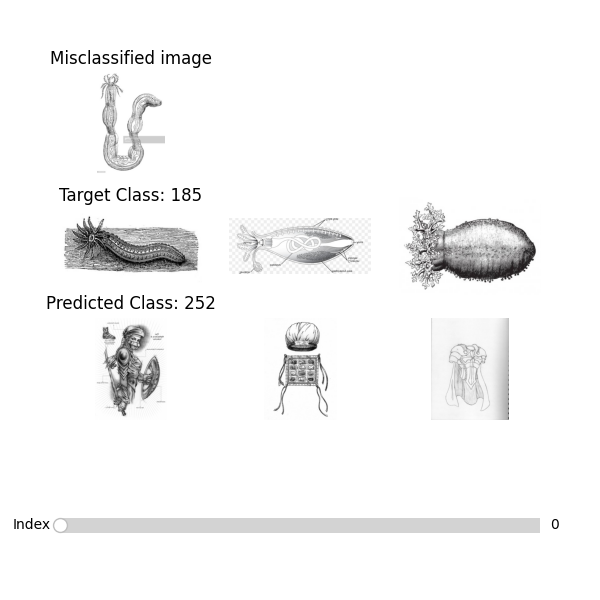

In [43]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# 데이터 준비 (이 부분은 실제 코드에 맞게 조정해야 합니다)
# miss_df, val_data_dir, class_name_to_idx 등의 데이터와 디렉토리 설정이 필요합니다

def plot_image(value):
    value = int(value)  # 슬라이더 값 추출
    ax[0, 0].clear()  # 서브플롯 초기화

    # 잘못 예측된 sample (miss_df에서 잘못 예측된 이미지 경로)
    img_path = os.path.join(val_data_dir, miss_df['image_path'].iloc[value])
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[0, 0].imshow(image)
    ax[0, 0].axis('off')
    ax[0, 0].set_title(f"Misclassified image")

    ax[0, 1].axis('off')
    ax[0, 2].axis('off')
    # 실제 클래스 이미지들
    target_dir = os.path.join(val_data_dir, str(class_name_to_idx[miss_df['target'].iloc[value]]))
    target_list = [f for f in os.listdir(target_dir) if f.startswith('s')]

    for i in range(3):
        ax[1, i].clear()
        if i < len(target_list):
            img_path = os.path.join(target_dir, target_list[i])
            image = cv2.imread(img_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax[1, i].imshow(image)
            ax[1, i].axis('off')
    ax[1, 0].set_title(f"Target Class: {miss_df['target'].iloc[value]}")

    # 예측된 클래스 이미지들
    pred_dir = os.path.join(val_data_dir, str(class_name_to_idx[miss_df['pred'].iloc[value]]))
    pred_list = [f for f in os.listdir(pred_dir) if f.startswith('s')]

    for i in range(3):
        ax[2, i].clear()
        if i < len(pred_list):
            img_path = os.path.join(pred_dir, pred_list[i])
            image = cv2.imread(img_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax[2, i].imshow(image)
            ax[2, i].axis('off')
    ax[2, 0].set_title(f"Predicted Class: {miss_df['pred'].iloc[value]}")

    plt.draw()  # 플롯 업데이트

# 초기 플롯 설정
fig, ax = plt.subplots(3, 3, figsize=(6, 6))
plt.subplots_adjust(left=0.1, bottom=0.3)  # 슬라이더 공간 확보

# 첫 번째 이미지 출력 (슬라이더 초기 값)
plot_image(0)

# 슬라이더 생성
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Index', 0, len(miss_df) - 1, valinit=0, valstep=1)

# 슬라이더 값이 변경될 때 호출되는 함수 설정
slider.on_changed(plot_image)

plt.show()
